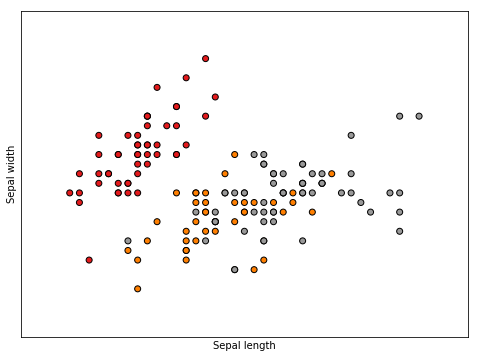

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data 
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
from Dotua.rautodiff import rAutoDiff as rad
from Dotua.roperator import rOperator as op
import random

rad = rad()

class NeuralNetwork():
    def __init__(self, input_vals, input_bias, hidden_bias, num_hidden, output, learning_rate = 0.1):
        self.input_vals = input_vals
        self.input_bias = input_bias
        self.hidden_bias = hidden_bias
        self.num_hidden = num_hidden
        self.output = output
        self.learning_rate = learning_rate

        self.weights_tohidden = [None] * num_hidden
        for i in range(num_hidden):
            self.weights_tohidden[i] = []
            for j in range(len(input_vals)):
                
                #DOTUA USED HERE: to initalize the weights from the input to hidden layer.
                w = rad.create_rscalar(random.random())
                self.weights_tohidden[i].append(w)
                self.weights_tooutput = [None] * len(output)
        
        for i in range(len(output)):
            self.weights_tooutput[i] = []
            
            #DOTUA USED HERE: to initialize weights from hidden to output.
            w = rad.create_rscalar(random.random())
            for j in range(num_hidden):
                self.weights_tooutput[i].append(w)

    def train(self, input_vals, output_vals):
        self.input_vals = input_vals
        self.output = output_vals

        #calculation of hidden layer.
        self.hidden_layer = []
        for i in range(self.num_hidden):
            h = 0
            for j in range(len(self.weights_tohidden[i])):
                h = h + self.weights_tohidden[i][j] * self.input_vals[j]
            h = h + self.input_bias
            self.hidden_layer.append(1/(1+op.exp(-h)))

        # To calculate the output layer neurons and error
        error = 0
        for i in range(len(self.output)):
            o = 0
            for j in range(len(self.weights_tooutput[i])):
                o = o + self.weights_tooutput[i][j] * self.hidden_layer[j]
            o = o + self.hidden_bias
            o = 1/(1+op.exp(-o))
            error = error + (o - self.output[i]) ** 2

        # To update weights from hidden layer to output layer
        for i in range(len(self.weights_tooutput)):
            for j in range(len(self.weights_tooutput[i])):
                
                #DOTUA USED HERE:
                d = rad.partial(error, self.weights_tooutput[i][j])
                self.weights_tooutput[i][j] = self.weights_tooutput[i][j] - d * self.learning_rate

        # To update weights from input layer to hidden layer
        for i in range(len(self.weights_tohidden)):
            for j in range(len(self.weights_tooutput[i])):
                
                #DOTUA USED HERE:
                d = rad.partial(error, self.weights_tohidden[i][j])
                self.weights_tohidden[i][j] = self.weights_tohidden[i][j] - d * self.learning_rate

    def predict(self, input_vals, output_vals):
        self.input_vals = input_vals
        self.output = output_vals

        # To calculate the hidden layer neurons using the current model
        self.hidden_layer = []
        for i in range(self.num_hidden):
            h = 0
            for j in range(len(self.weights_tohidden[i])):
                h = h + self.weights_tohidden[i][j] * self.input_vals[j]
            h = h + self.input_bias
            self.hidden_layer.append(1/(1+op.exp(-h)))

        # To calculate the output layer neurons using the current model and calculate the error 
        error = 0
        output_layer = []
        for i in range(len(self.output)):
            o = 0
            for j in range(len(self.weights_tooutput[i])):
                o = o + self.weights_tooutput[i][j] * self.hidden_layer[j]
            o = o + self.hidden_bias
            o = 1/(1+op.exp(-o))
            output_layer.append(o.val)
            error = error + (o - self.output[i]) ** 2
        error = error / len(self.output)
        return (output_layer, error.val)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=64)

In [5]:
import numpy as np
def get_y(i):
    train_y = [0,0,0]
    train_y[i] = 1
    return train_y

nn = NeuralNetwork([0,0,0],0.33,0.33,2,[0,0,0])

for j in range(10):
    for i in range(1, len(X_train)):
        nn.train(X_train[i], get_y(y_train[i]))

train_e = []
true_y = []
predicted_y = []
for i in range(1, len(X_train)):
    output,e = nn.predict(X_train[i], get_y(y_train[i]))
    train_e.append(e)
    #print(e)
    if max(output) == output[0]:
        predicted_y.append(0)
    elif max(output) == output[1]:
        predicted_y.append(1)
    else:
        predicted_y.append(2)
    
    true_y.append(y_train[i])

0.21348803744787012
0.21254081129631988
0.044559419208353
0.04890222893158452
0.04450287988318228
0.04349774718560289
0.21466232847050185
0.13119518602826477
0.2178620268967194
0.12342998334284959
0.2161210505493766
0.0405182482047402
0.052294617481910666
0.21413558467552832
0.1302087817541979
0.05625594345565965
0.21831582826455245
0.12506295014721905
0.130735194867679
0.03658327710017189
0.03557114676903797
0.21471111022786737
0.03262788779820591
0.13406536019259419
0.13432585441918035
0.12925110147105037
0.1287453650603189
0.21195415799088288
0.1282074938424613
0.212321338321625
0.2119322045288383
0.0446614208405288
0.21194289451912654
0.216324086468923
0.0457828445986792
0.21360483972521668
0.12978630800406113
0.05043308330164026
0.21193346955540238
0.12528446370958965
0.21423685235620393
0.034017977615418575
0.21950962357844797
0.2139983089432421
0.22018282532510147
0.03896568745406787
0.1424547593472066
0.21190545510540834
0.13053309424576384
0.2141603299419422
0.2196257716225574

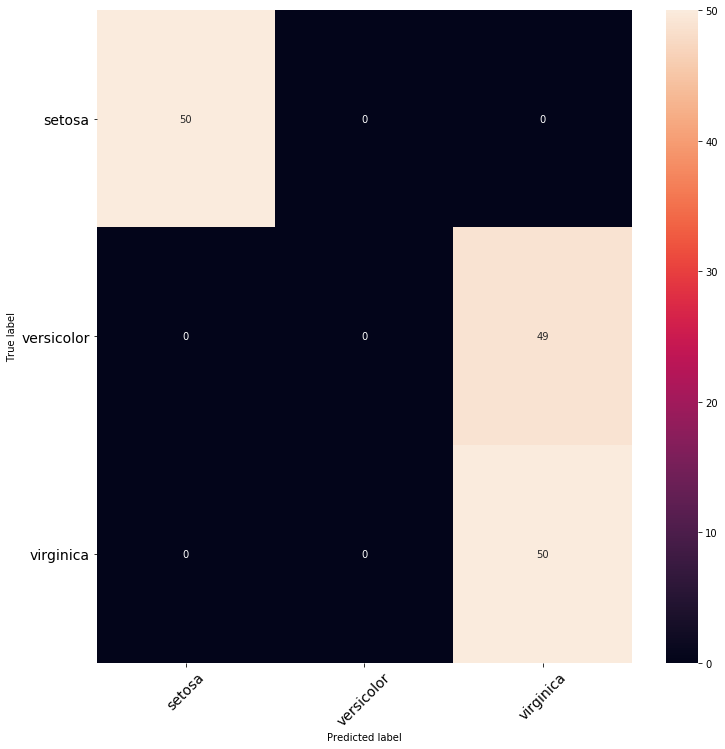

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix(true_y,predicted_y),
                     index=['setosa','versicolor','virginica'], columns=['setosa','versicolor','virginica'])
plt.figure(figsize=(12,12))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()